In [5]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

sales_data = [
    ('Laptop', 5, 800.0),
    ('Phone', 10, 500.0),
    ('Tablet', 7, 300.0),
    ('Headphones', 15, 50.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)

conn.commit()
conn.close()

print("Database 'sales_data.db' created and populated successfully!")

Database 'sales_data.db' created and populated successfully!


In [6]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('sales_data.db')

query = '''
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print("Sales Summary:")
print(df)

conn.close()

Sales Summary:
      product  total_qty  revenue
0  Headphones         30   1500.0
1      Laptop         10   8000.0
2       Phone         20  10000.0
3      Tablet         14   4200.0


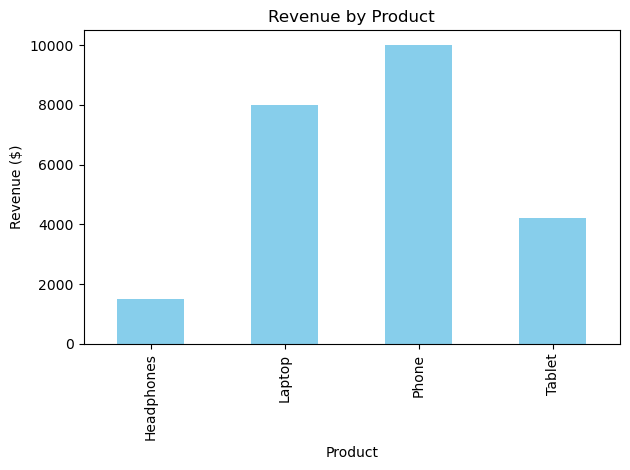

In [8]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()